In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px

# CREATE CLUSTERS BASED AVERAGE HOURLY AVAILABILITY FOR ALL DAYS OF WEEK

In [2]:
all_days = pd.read_csv('all_days_availability_2018-19.csv')
all_days

,dock_id,dock_name,hour,avail_bikes,tot_docks,avail_bikes_proportion
0,72,W 52 St & 11 Ave,0,17.047619,55.0,0.309957
1,72,W 52 St & 11 Ave,1,15.454545,55.0,0.280992
2,72,W 52 St & 11 Ave,2,17.529412,55.0,0.318717
3,72,W 52 St & 11 Ave,3,17.291667,55.0,0.314394
4,72,W 52 St & 11 Ave,4,14.652174,55.0,0.266403
...,...,...,...,...,...,...
10910,3537,Carlton Ave & Dean St,21,10.250000,29.0,0.353448
10911,3537,Carlton Ave & Dean St,22,10.000000,29.0,0.344828
10912,3537,Carlton Ave & Dean St,23,9.500000,29.0,0.327586
10913,3629,Adam Clayton Powell Blvd & W 126 St,11,17.000000,33.0,0.515152


In [3]:
all_days.dock_id.nunique()

472

In [4]:
avail_hrs = all_days.drop(columns = ['dock_name', 'avail_bikes', 'tot_docks'])
avail_hrs = avail_hrs.pivot_table(index = 'dock_id', columns = 'hour', 
               values = 'avail_bikes_proportion', aggfunc = 'mean')
avail_hrs

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dock_id,,,,,,,,,,,,,,,,,,,,,
72,0.309957,0.280992,0.318717,0.314394,0.266403,0.294737,0.277778,0.267424,0.284492,0.274242,...,0.251136,0.248485,0.329870,0.304545,0.316364,0.279144,0.309091,0.262500,0.295187,0.329412
83,0.384525,0.381283,0.373302,0.380242,0.377304,0.364971,0.373239,0.395475,0.384409,0.402796,...,0.468766,0.493728,0.467281,0.476121,0.455645,0.455699,0.441935,0.438289,0.420718,0.433499
119,0.554977,0.555973,0.578016,0.565440,0.556455,0.541015,0.550808,0.552399,0.539732,0.540883,...,0.476842,0.496842,0.492552,0.511420,0.504612,0.536536,0.505263,0.515373,0.508772,0.511036
120,0.631579,0.626105,0.639031,0.631579,0.628903,0.623518,0.602918,0.585934,0.579979,0.477803,...,0.261595,0.253257,0.250369,0.269552,0.298246,0.386640,0.431475,0.477368,0.499749,0.522354
143,0.371764,0.379265,0.376827,0.386232,0.390537,0.388765,0.397467,0.411550,0.462379,0.536232,...,0.571970,0.525417,0.566589,0.525312,0.535289,0.503571,0.484736,0.500000,0.524371,0.535018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0.643357,0.565171,0.608262,0.635684,0.620726,0.593792,0.615385,0.650794,0.619910,0.647436,...,0.450142,0.479487,0.403846,0.494872,0.496229,0.581197,0.530364,0.575499,0.538462,0.584936
3535,0.640212,0.611111,0.682099,0.674897,0.687243,0.671958,0.682540,0.694989,0.679012,0.639918,...,0.453704,0.470899,0.457516,0.533333,0.515432,0.568783,0.505291,0.561254,0.521368,0.501425
3536,0.040169,0.067183,0.052326,0.054968,0.059197,0.069767,0.058140,0.058140,0.063953,0.080338,...,0.037791,0.025840,0.053488,0.023256,0.031977,0.026163,0.028424,0.020349,0.037791,0.034884


In [12]:
avail_hrs = avail_hrs.dropna(axis = 0)
avail_hrs

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dock_id,,,,,,,,,,,,,,,,,,,,,
72,0.309957,0.280992,0.318717,0.314394,0.266403,0.294737,0.277778,0.267424,0.284492,0.274242,...,0.251136,0.248485,0.329870,0.304545,0.316364,0.279144,0.309091,0.262500,0.295187,0.329412
83,0.384525,0.381283,0.373302,0.380242,0.377304,0.364971,0.373239,0.395475,0.384409,0.402796,...,0.468766,0.493728,0.467281,0.476121,0.455645,0.455699,0.441935,0.438289,0.420718,0.433499
119,0.554977,0.555973,0.578016,0.565440,0.556455,0.541015,0.550808,0.552399,0.539732,0.540883,...,0.476842,0.496842,0.492552,0.511420,0.504612,0.536536,0.505263,0.515373,0.508772,0.511036
120,0.631579,0.626105,0.639031,0.631579,0.628903,0.623518,0.602918,0.585934,0.579979,0.477803,...,0.261595,0.253257,0.250369,0.269552,0.298246,0.386640,0.431475,0.477368,0.499749,0.522354
143,0.371764,0.379265,0.376827,0.386232,0.390537,0.388765,0.397467,0.411550,0.462379,0.536232,...,0.571970,0.525417,0.566589,0.525312,0.535289,0.503571,0.484736,0.500000,0.524371,0.535018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,0.493213,0.466231,0.459893,0.493915,0.506536,0.470588,0.521390,0.443439,0.469188,0.488844,...,0.434174,0.469251,0.447861,0.469188,0.448097,0.500000,0.429412,0.425697,0.468858,0.452614
3534,0.643357,0.565171,0.608262,0.635684,0.620726,0.593792,0.615385,0.650794,0.619910,0.647436,...,0.450142,0.479487,0.403846,0.494872,0.496229,0.581197,0.530364,0.575499,0.538462,0.584936
3535,0.640212,0.611111,0.682099,0.674897,0.687243,0.671958,0.682540,0.694989,0.679012,0.639918,...,0.453704,0.470899,0.457516,0.533333,0.515432,0.568783,0.505291,0.561254,0.521368,0.501425


In [5]:
kmeans_model = KMeans(random_state=0)

In [59]:
def elbow_plot(k,data):
    inertia = []
    clusters = range(1,k)
    for cluster in clusters:
        kmeans_model = KMeans()
        kmeans_model.set_params(n_clusters=cluster, random_state = 5)
        kmeans_model.fit(data)
        inertia.append(kmeans_model.inertia_)
    plt.plot(clusters, inertia, marker= "x")
    plt.xlabel('k')
    plt.xticks(np.arange(k))
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

In [60]:
def kmeans_cluster_plots(k, data):
    df = data
    kmeans_model = KMeans()
    kmeans_model.set_params(n_clusters = k, random_state = 5)
    kmean = kmeans_model.fit_predict(df)
    df['cluster'] = kmean
    
    for i in range(k):
        cluster = df[df['cluster'] == i]
        cluster = np.array(cluster)
        for j in range(len(cluster)):
            plt.plot(range(24), cluster[j][:-1])
        plt.show()

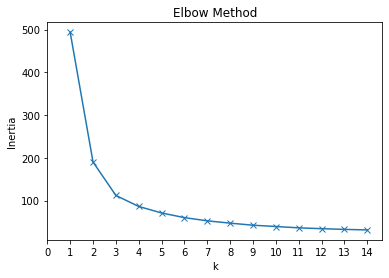

In [13]:
elbow_plot(15, avail_hrs)

<ipython-input-8-fc94c967a972>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmean


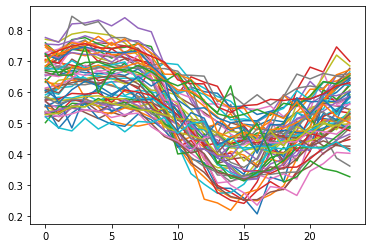

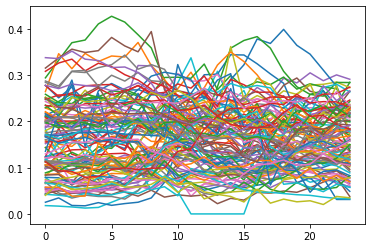

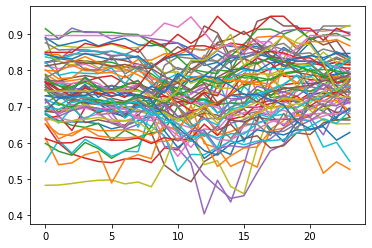

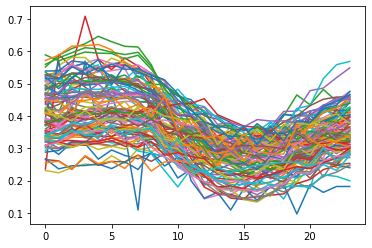

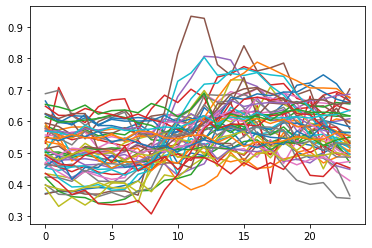

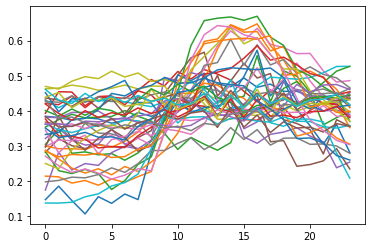

In [17]:
kmeans_cluster_plots(6, avail_hrs)

# CREATE CLUSTERS BASED AVERAGE HOURLY AVAILABILITY FOR ALL WEEKDAYS

In [33]:
weekdays = pd.read_csv('weekday_availability_2018-19.csv')
weekdays

,dock_id,dock_name,hour,avail_bikes,tot_docks,avail_bikes_proportion
0,72,W 52 St & 11 Ave,0,16.422222,55.0,0.298586
1,72,W 52 St & 11 Ave,1,17.440000,55.0,0.317091
2,72,W 52 St & 11 Ave,2,16.365385,55.0,0.297552
3,72,W 52 St & 11 Ave,3,16.130435,55.0,0.293281
4,72,W 52 St & 11 Ave,4,17.117647,55.0,0.311230
...,...,...,...,...,...,...
11218,3537,Carlton Ave & Dean St,21,19.250000,29.0,0.663793
11219,3537,Carlton Ave & Dean St,22,18.833333,29.0,0.649425
11220,3537,Carlton Ave & Dean St,23,16.666667,29.0,0.574713
11221,3538,W 110 St & Amsterdam Ave,11,12.000000,45.0,0.266667


In [34]:
all_days.dock_id.nunique()

472

In [35]:
avail_hrs_weekday = weekdays.drop(columns = ['dock_name', 'avail_bikes', 'tot_docks'])
avail_hrs_weekday = avail_hrs_weekday.pivot_table(index = 'dock_id', columns = 'hour', 
               values = 'avail_bikes_proportion', aggfunc = 'mean')
avail_hrs_weekday

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dock_id,,,,,,,,,,,,,,,,,,,,,
72,0.298586,0.317091,0.297552,0.293281,0.311230,0.285227,0.331501,0.353846,0.266182,0.180519,...,0.208741,0.189161,0.206182,0.186096,0.182931,0.188760,0.202975,0.235294,0.275809,0.287603
79,NaN,NaN,NaN,0.257143,0.257143,0.257143,0.228571,0.285714,0.400000,0.485714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,0.376107,0.362940,0.364025,0.360190,0.362332,0.359949,0.372751,0.411666,0.449297,0.542506,...,0.539950,0.555637,0.551838,0.547805,0.514607,0.482121,0.440562,0.429925,0.406480,0.377891
119,0.554628,0.542155,0.556908,0.554118,0.554946,0.549183,0.536770,0.542775,0.517513,0.482525,...,0.471617,0.500000,0.510121,0.503976,0.535625,0.530461,0.523293,0.527748,0.535624,0.549426
120,0.702415,0.712651,0.694737,0.692839,0.692530,0.684749,0.617757,0.481041,0.333273,0.182987,...,0.281448,0.277018,0.321981,0.358271,0.436191,0.542141,0.600280,0.650363,0.679714,0.707528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0.670053,0.665242,0.671144,0.643928,0.651608,0.631657,0.619658,0.584881,0.504274,0.448718,...,0.447344,0.392473,0.436304,0.469361,0.492388,0.591026,0.622549,0.652015,0.649321,0.666246
3535,0.538126,0.531893,0.534663,0.542181,0.558140,0.528807,0.500000,0.435411,0.388889,0.268817,...,0.177388,0.163743,0.243115,0.272904,0.314815,0.416904,0.493827,0.473251,0.511628,0.533138
3536,0.019027,0.024978,0.022326,0.029767,0.041085,0.084651,0.024419,0.067084,0.085271,0.125138,...,0.097252,0.081860,0.069767,0.070736,0.050664,0.049096,0.051938,0.028623,0.032258,0.034884


In [36]:
avail_hrs_weekday = avail_hrs_weekday.dropna(axis = 0)
avail_hrs_weekday

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dock_id,,,,,,,,,,,,,,,,,,,,,
72,0.298586,0.317091,0.297552,0.293281,0.311230,0.285227,0.331501,0.353846,0.266182,0.180519,...,0.208741,0.189161,0.206182,0.186096,0.182931,0.188760,0.202975,0.235294,0.275809,0.287603
83,0.376107,0.362940,0.364025,0.360190,0.362332,0.359949,0.372751,0.411666,0.449297,0.542506,...,0.539950,0.555637,0.551838,0.547805,0.514607,0.482121,0.440562,0.429925,0.406480,0.377891
119,0.554628,0.542155,0.556908,0.554118,0.554946,0.549183,0.536770,0.542775,0.517513,0.482525,...,0.471617,0.500000,0.510121,0.503976,0.535625,0.530461,0.523293,0.527748,0.535624,0.549426
120,0.702415,0.712651,0.694737,0.692839,0.692530,0.684749,0.617757,0.481041,0.333273,0.182987,...,0.281448,0.277018,0.321981,0.358271,0.436191,0.542141,0.600280,0.650363,0.679714,0.707528
143,0.302730,0.289844,0.281250,0.276678,0.264069,0.276541,0.338136,0.538043,0.804633,0.811111,...,0.725570,0.706691,0.633420,0.453704,0.311027,0.208900,0.198439,0.222269,0.251460,0.252513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,0.449715,0.457516,0.461601,0.475643,0.511312,0.513185,0.481687,0.514706,0.513692,0.477005,...,0.477591,0.433707,0.487522,0.483957,0.439916,0.480818,0.476761,0.480838,0.479666,0.464948
3534,0.670053,0.665242,0.671144,0.643928,0.651608,0.631657,0.619658,0.584881,0.504274,0.448718,...,0.447344,0.392473,0.436304,0.469361,0.492388,0.591026,0.622549,0.652015,0.649321,0.666246
3535,0.538126,0.531893,0.534663,0.542181,0.558140,0.528807,0.500000,0.435411,0.388889,0.268817,...,0.177388,0.163743,0.243115,0.272904,0.314815,0.416904,0.493827,0.473251,0.511628,0.533138


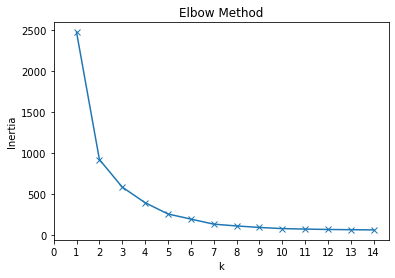

In [61]:
elbow_plot(15, avail_hrs_weekday)

<ipython-input-60-41cc463b2aac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmean


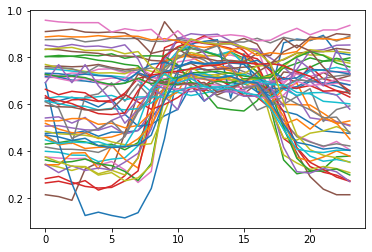

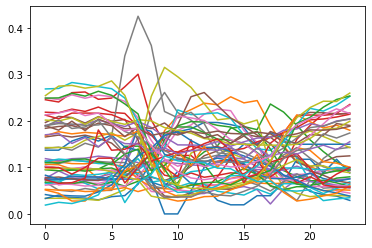

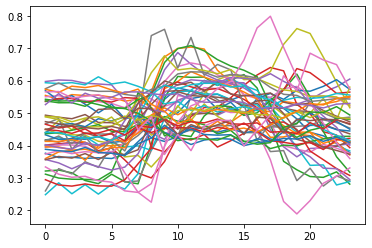

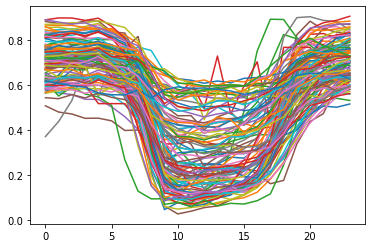

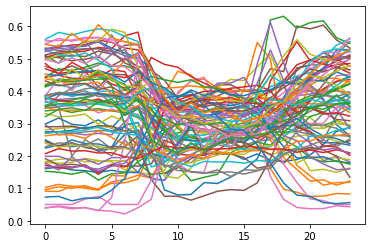

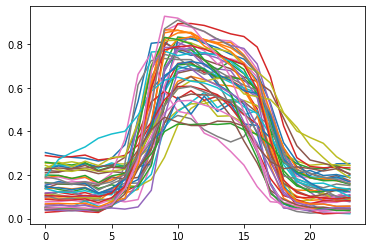

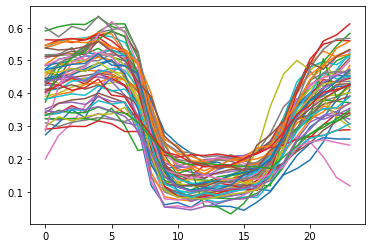

In [66]:
kmeans_cluster_plots(7, avail_hrs_weekday)

# CREATE CLUSTERS BASED AVERAGE HOURLY AVAILABILITY FOR ALL WEEKENDS

In [39]:
weekends = pd.read_csv('weekend_availability_2018-19.csv')
weekends

,dock_id,dock_name,hour,avail_bikes,tot_docks,avail_bikes_proportion
0,72,W 52 St & 11 Ave,0,17.047619,55.0,0.309957
1,72,W 52 St & 11 Ave,1,15.454545,55.0,0.280992
2,72,W 52 St & 11 Ave,2,17.529412,55.0,0.318717
3,72,W 52 St & 11 Ave,3,17.291667,55.0,0.314394
4,72,W 52 St & 11 Ave,4,14.652174,55.0,0.266403
...,...,...,...,...,...,...
10910,3537,Carlton Ave & Dean St,21,10.250000,29.0,0.353448
10911,3537,Carlton Ave & Dean St,22,10.000000,29.0,0.344828
10912,3537,Carlton Ave & Dean St,23,9.500000,29.0,0.327586
10913,3629,Adam Clayton Powell Blvd & W 126 St,11,17.000000,33.0,0.515152


In [40]:
weekends.dock_id.nunique()

472

In [41]:
avail_hrs_weekend = weekends.drop(columns = ['dock_name', 'avail_bikes', 'tot_docks'])
avail_hrs_weekend = avail_hrs_weekend.pivot_table(index = 'dock_id', columns = 'hour', 
               values = 'avail_bikes_proportion', aggfunc = 'mean')
avail_hrs_weekend

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dock_id,,,,,,,,,,,,,,,,,,,,,
72,0.309957,0.280992,0.318717,0.314394,0.266403,0.294737,0.277778,0.267424,0.284492,0.274242,...,0.251136,0.248485,0.329870,0.304545,0.316364,0.279144,0.309091,0.262500,0.295187,0.329412
83,0.384525,0.381283,0.373302,0.380242,0.377304,0.364971,0.373239,0.395475,0.384409,0.402796,...,0.468766,0.493728,0.467281,0.476121,0.455645,0.455699,0.441935,0.438289,0.420718,0.433499
119,0.554977,0.555973,0.578016,0.565440,0.556455,0.541015,0.550808,0.552399,0.539732,0.540883,...,0.476842,0.496842,0.492552,0.511420,0.504612,0.536536,0.505263,0.515373,0.508772,0.511036
120,0.631579,0.626105,0.639031,0.631579,0.628903,0.623518,0.602918,0.585934,0.579979,0.477803,...,0.261595,0.253257,0.250369,0.269552,0.298246,0.386640,0.431475,0.477368,0.499749,0.522354
143,0.371764,0.379265,0.376827,0.386232,0.390537,0.388765,0.397467,0.411550,0.462379,0.536232,...,0.571970,0.525417,0.566589,0.525312,0.535289,0.503571,0.484736,0.500000,0.524371,0.535018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0.643357,0.565171,0.608262,0.635684,0.620726,0.593792,0.615385,0.650794,0.619910,0.647436,...,0.450142,0.479487,0.403846,0.494872,0.496229,0.581197,0.530364,0.575499,0.538462,0.584936
3535,0.640212,0.611111,0.682099,0.674897,0.687243,0.671958,0.682540,0.694989,0.679012,0.639918,...,0.453704,0.470899,0.457516,0.533333,0.515432,0.568783,0.505291,0.561254,0.521368,0.501425
3536,0.040169,0.067183,0.052326,0.054968,0.059197,0.069767,0.058140,0.058140,0.063953,0.080338,...,0.037791,0.025840,0.053488,0.023256,0.031977,0.026163,0.028424,0.020349,0.037791,0.034884


In [42]:
avail_hrs_weekend = avail_hrs_weekend.dropna(axis = 0)
avail_hrs_weekend

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dock_id,,,,,,,,,,,,,,,,,,,,,
72,0.309957,0.280992,0.318717,0.314394,0.266403,0.294737,0.277778,0.267424,0.284492,0.274242,...,0.251136,0.248485,0.329870,0.304545,0.316364,0.279144,0.309091,0.262500,0.295187,0.329412
83,0.384525,0.381283,0.373302,0.380242,0.377304,0.364971,0.373239,0.395475,0.384409,0.402796,...,0.468766,0.493728,0.467281,0.476121,0.455645,0.455699,0.441935,0.438289,0.420718,0.433499
119,0.554977,0.555973,0.578016,0.565440,0.556455,0.541015,0.550808,0.552399,0.539732,0.540883,...,0.476842,0.496842,0.492552,0.511420,0.504612,0.536536,0.505263,0.515373,0.508772,0.511036
120,0.631579,0.626105,0.639031,0.631579,0.628903,0.623518,0.602918,0.585934,0.579979,0.477803,...,0.261595,0.253257,0.250369,0.269552,0.298246,0.386640,0.431475,0.477368,0.499749,0.522354
143,0.371764,0.379265,0.376827,0.386232,0.390537,0.388765,0.397467,0.411550,0.462379,0.536232,...,0.571970,0.525417,0.566589,0.525312,0.535289,0.503571,0.484736,0.500000,0.524371,0.535018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,0.493213,0.466231,0.459893,0.493915,0.506536,0.470588,0.521390,0.443439,0.469188,0.488844,...,0.434174,0.469251,0.447861,0.469188,0.448097,0.500000,0.429412,0.425697,0.468858,0.452614
3534,0.643357,0.565171,0.608262,0.635684,0.620726,0.593792,0.615385,0.650794,0.619910,0.647436,...,0.450142,0.479487,0.403846,0.494872,0.496229,0.581197,0.530364,0.575499,0.538462,0.584936
3535,0.640212,0.611111,0.682099,0.674897,0.687243,0.671958,0.682540,0.694989,0.679012,0.639918,...,0.453704,0.470899,0.457516,0.533333,0.515432,0.568783,0.505291,0.561254,0.521368,0.501425


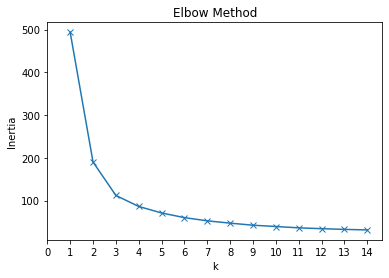

In [43]:
elbow_plot(15, avail_hrs_weekend)

<ipython-input-8-fc94c967a972>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmean


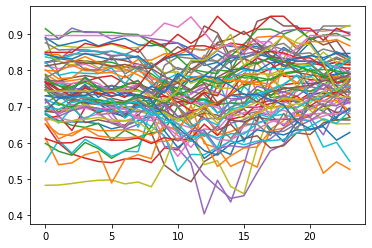

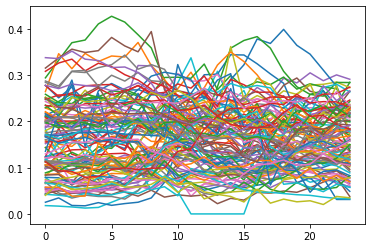

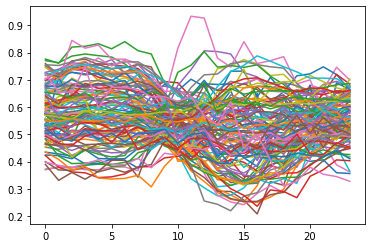

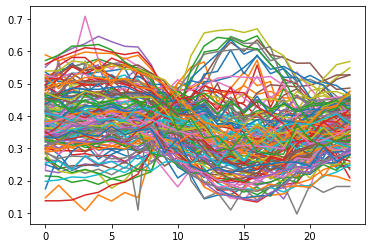

In [44]:
kmeans_cluster_plots(4, avail_hrs_weekend)